**QSAR ORAL TOXICITY PREDICATION**

**Data Understanding and Preparation**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

# The last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Check class distribution
print(y.value_counts())


1024
negative    8251
positive     741
Name: count, dtype: int64


**resampling and balancing the datasets**

**SMOTE for Oversampling + Random Undersampling**

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Define pipeline
over = SMOTE(sampling_strategy=0.5)  # Oversample minority to 50% of majority
under = RandomUnderSampler(sampling_strategy=0.8)  # Undersample majority to 80% more than minority
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply resampling
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check new class distribution
print(f"Resampled class distribution: {Counter(y_resampled)}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Resampled class distribution: Counter({'negative': 5156, 'positive': 4125})


**use random foreset model**

Random Forest Accuracy: 0.9500897666068223

Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.95      0.95      1547
    positive       0.94      0.95      0.94      1238

    accuracy                           0.95      2785
   macro avg       0.95      0.95      0.95      2785
weighted avg       0.95      0.95      0.95      2785



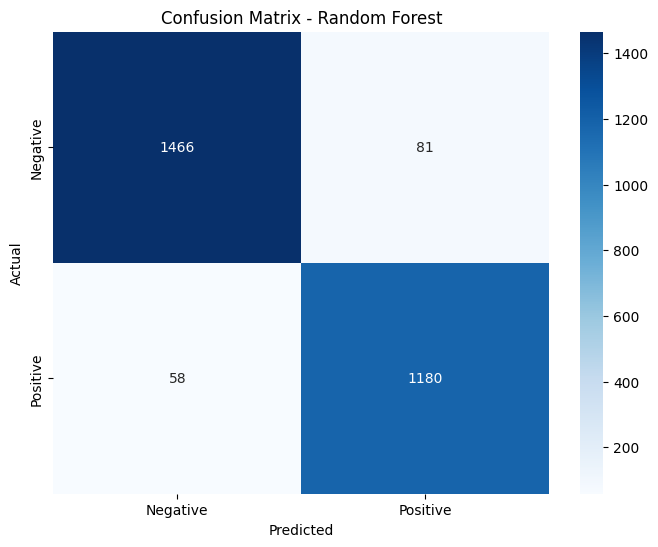

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


**K-NN model**

KNN Accuracy: 0.7073608617594255

Classification Report:
               precision    recall  f1-score   support

    negative       0.99      0.48      0.65      1547
    positive       0.60      0.99      0.75      1238

    accuracy                           0.71      2785
   macro avg       0.80      0.74      0.70      2785
weighted avg       0.82      0.71      0.69      2785



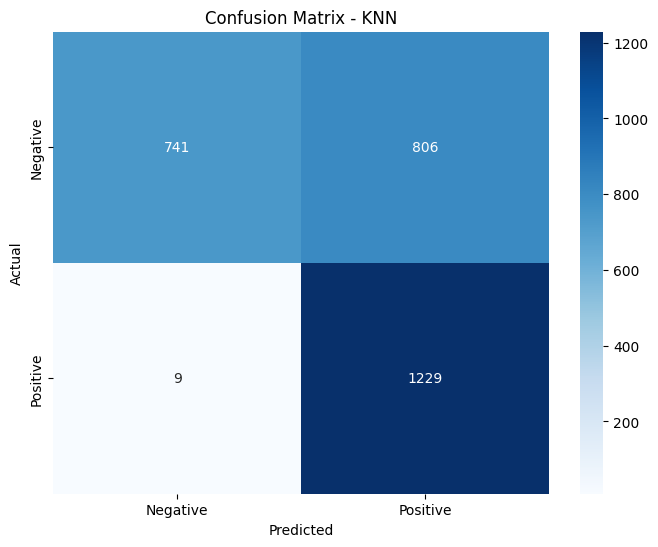

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

**Logistic Regression**

Logistic Regression Accuracy: 0.8933572710951526

Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.87      0.90      1547
    positive       0.85      0.92      0.88      1238

    accuracy                           0.89      2785
   macro avg       0.89      0.90      0.89      2785
weighted avg       0.90      0.89      0.89      2785



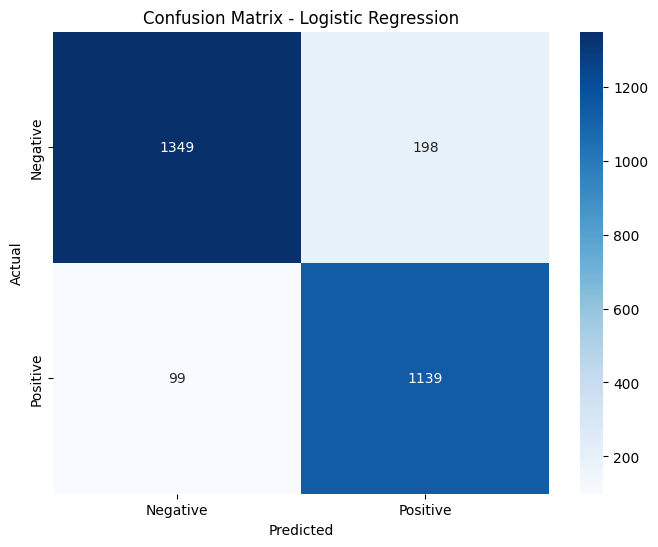

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**XGBoost**

XGBoost Accuracy: 0.9486535008976661

Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.95      0.95      1547
    positive       0.94      0.95      0.94      1238

    accuracy                           0.95      2785
   macro avg       0.95      0.95      0.95      2785
weighted avg       0.95      0.95      0.95      2785



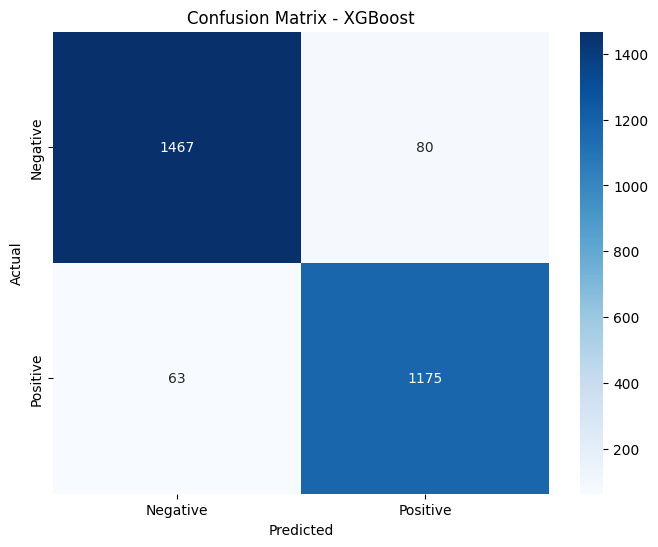

In [25]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode string labels to numerical values (0 and 1)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train_encoded)
y_pred_xgb = xgb.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Detailed classification report (using original class names)
print("\nClassification Report:\n", classification_report(y_test, le.inverse_transform(y_pred_xgb), 
      target_names=['negative', 'positive']))

# Confusion matrix (with original class names)
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

**comparison**

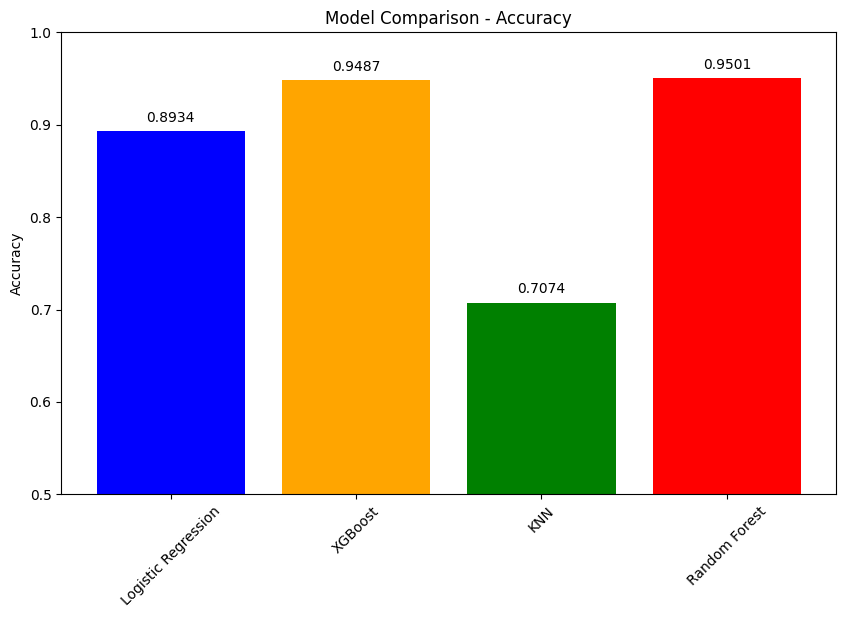

In [30]:
# Compare model accuracies
models = ['Logistic Regression', 'XGBoost', 'KNN', 'Random Forest']
accuracies = [accuracy_lr, accuracy_xgb, accuracy_knn, accuracy]

plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()